<a href="https://colab.research.google.com/github/erikyryan/document-classification/blob/main/document_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Base de treinamento para a IA

### `Import das funções`

In [102]:
import matplotlib.pyplot as plt
import numpy as np
import random
import requests
import os
import zipfile

from random import randint
from sklearn import metrics
from sklearn.svm import SVC

# Leitura dos imagens

In [103]:
pathSample = 'https://drive.google.com/uc?id=144EqqmMtCziua9iYo-3afUEvZrJVxUXU&export=download&confirm=t&uuid=363cbdc1-ef8d-40e3-ac8f-92e8efbac4de&at=AKKF8vwO3Rerxp4Y4e7nvK22YqGB:1687737101639' #Database Sample
compressionSamplePath = '/content/storage/sample.zip'
if not(os.path.isdir('/content/storage')):
  os.mkdir('storageasd') #diretorio para armazenar os arquivos baixados.

In [105]:
response = requests.post(pathSample)

if 'Content-Disposition' in response.headers:
    # Extrai o nome do arquivo do cabeçalho
    header = response.headers['Content-Disposition']
    filename = header.split('filename=')[1].strip('"')
else:
    print("Nome do arquivo não encontrado na resposta.")

with open(compressionSamplePath, 'wb') as file:
    file.write(response.content)

with zipfile.ZipFile(compressionSamplePath, 'r') as zip_ref:
    zip_ref.extractall('/content/storage/' + filename)

Nome do arquivo: BID Sample Dataset.zip"; filename*=UTF-8''BID%20Sample%20Dataset.zip


In [20]:
cnh_aberta =  readpath(pathSample + '/dataset/CNH_Aberta/*')
cnh_aberta =  read_files(cnh_aberta)
cnh_aberta = resize_img(cnh_aberta,(64,64))

cnh_frente =  readpath(pathSample + '/dataset/CNH_Frente/*')
cnh_frente =  read_files(cnh_frente)
cnh_frente = resize_img(cnh_frente,(64,64))

cnh_verso =  readpath(pathSample +  '/dataset/CNH_Verso/*')
cnh_verso =  read_files(cnh_verso)
cnh_verso = resize_img(cnh_verso,(64,64))

In [ ]:
cpf_frente =  cd.readpath(pathSample + '/dataset/CPF_Frente/*')
cpf_frente =  cd.read_files(cpf_frente)
cpf_frente = cd.resize_img(cpf_frente,(64,64))

cpf_verso =  cd.readpath(pathSample +'/dataset/CPF_Verso/*')
cpf_verso =  cd.read_files(cpf_verso)
cpf_verso = cd.resize_img(cpf_verso,(64,64))

In [ ]:
rg_frente =  cd.readpath(pathSample + '/dataset/RG_Frente/*')
rg_frente =  cd.read_files(rg_frente)
rg_frente = cd.resize_img(rg_frente,(64,64))

rg_verso =  cd.readpath(pathSample + '/dataset/RG_Verso/*')
rg_verso =  cd.read_files(rg_verso)
rg_verso = cd.resize_img(rg_verso,(64,64))

rg_aberto =  cd.readpath(pathSample + '/dataset/RG_Aberto/*')
rg_aberto =  cd.read_files(rg_aberto)
rg_aberto = cd.resize_img(rg_aberto,(64,64))

## Teste de plotagem

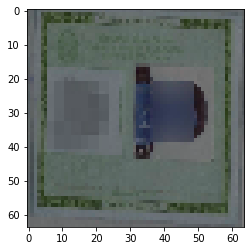

In [ ]:
plt.imshow(rg_frente[0])
plt.show()

## Preparação dos dados para o treinamento

In [ ]:
labels = [1,2,3,4,5,6,7,8]
documents = []

for a,b,c,d,e,f,g,h in zip(cnh_aberta,cnh_frente,cnh_verso,cpf_frente,cpf_verso,rg_frente,rg_verso,rg_aberto):
	documents.append({'x':a, 'y':labels[0]})
	documents.append({'x':b,'y':labels[1]})
	documents.append({'x':c,'y':labels[2]})
	documents.append({'x':d,'y':labels[3]})
	documents.append({'x':e,'y':labels[4]})
	documents.append({'x':f,'y':labels[5]})
	documents.append({'x':g,'y':labels[6]})
	documents.append({'x':h,'y':labels[7]})


In [ ]:
x_train = []
y_train = []

x_test = []
y_test = []

i = 0
for document in documents:
	if i < 1000:
		x_train.append(document['x'])
		y_train.append(document['y'])
	else: break

np.random.shuffle(documents[1000:]) #embaralhando os documentos

i = 0
for document in documents[1000:]:
	if i < 1000:
		x_test.append(document['x'])
		y_test.append(document['y'])
	else: break


In [ ]:
x_train, y_train = cd.started_values(x_train,y_train)
x_test, y_test = cd.started_values(x_test,y_test)

# Modelo SVM

In [ ]:
document_classifier = SVC(kernel='linear')
document_classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [ ]:
test = random.choice(documents[1000:]) #escolhendo de forma aleatória

prediction  = document_classifier.predict(test['x'].reshape(1,-1))

Document: CPF


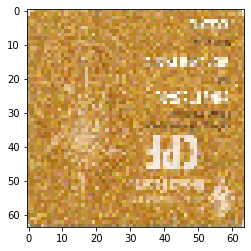

In [ ]:
print('Document:', cd.result(prediction))

plt.imshow(test['x'])
plt.show()

# Rede Neural Convolucional

In [ ]:
import tensorflow as tf
import keras as K
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout

### Normalizando os dados entre 0 e 1

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

classifier.add(Conv2D(32, (3, 3), activation = 'relu'))

classifier.add(MaxPooling2D(pool_size = (2, 2)))

In [ ]:
classifier.add(Flatten())

In [ ]:
classifier.add(Dense(1000,activation='relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(500,activation='relu'))

classifier.add(Dropout(0.5))

classifier.add(Dense(250,activation='relu'))

classifier.add(Dense(10,activation='softmax'))

In [ ]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 1000)              6

In [ ]:
test_loss, test_acc = classifier.evaluate(y_test, x_test)
print("Accuracy: ", test_acc)

# Treinando a Rede Neural Convolucional

In [ ]:
from tensorflow.keras.utils import to_categorical

#classificação
classification = ['CNH','CNH','CNH','CPF','CPF','RG','RG','RG']

y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

## Treinando o modelo

In [ ]:
hist = classifier.fit(x_train,y_train_one_hot,
                 batch_size=256,
                 epochs=10,
                 validation_split=0.2)

## Teste do modelo exemplo

In [ ]:
from google.colab import files
uploaded = files.upload()

#show the image
new_img = plt.imread('nome_da_imagem.jpg')
img = plt.imshow(new_img)

### Resize na imagem

In [ ]:
#resize image
from skimage.transform import resize
resized_image = resize(new_img,(64,64,3))
img = plt.imshow(resized_image)

## Predictions

In [ ]:
predictions = classifier.predict(np.array([resized_image])) #Get the models predictions

## Aplicação do modelo

In [ ]:
from types import prepare_class
#Sort the predictions from least to greatest
list_index = [1,2,3,4,5,6,7,8]
x = predictions

for i in range(8):
  for j in range(8):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted labels order
print(list_index)

# Modelo de Acurácia

In [ ]:
#Vizualizacao do modelo de accuraria

#print('Accuracy:',metrics.accuracy_score(y_test[:1000],y_train[:1000]))

plt.plot(y_test[:1000])
plt.plot(y_train[:1000])
plt.title("Modelo de Acurácia:")
plt.ylabel('Acurácia')
plt.xlabel('Tempo')
plt.legend(['Treinamento', 'Valor'], loc='upper right')
plt.show()

## Modelo de accuracy

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy']) #validation accuracy
plt.title('Model accucary')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

## Modelo de loss

In [ ]:
#Vizualise the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss']) #validation loss
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc='upper right')
plt.show()

# Modelo de Perda

In [ ]:
#Vizulizacao do modelo de perda

plt.plot(y_test[:1000])
plt.plot(y_test[:1000])
plt.title("Modelo de Perda:")
plt.ylabel('Perda')
plt.xlabel('Tempo')
plt.legend(['Treinamento', 'Valor'], loc='upper left')
plt.show()